In [6]:
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

/var/folders/7g/1911wwts4674nvtbzklkgln00000gn/T/ipykernel_32099/989238866.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700
2023-01-06,127.962440,128.623871,123.292931,124.398611,87754700
2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800


In [4]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()


In [5]:
data

Price,Close,High,Low,Open,Volume,MA7,MA30
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500,NaN,NaN
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600,NaN,NaN
2023-01-05,123.421249,126.136083,123.164580,125.504267,80962700,NaN,NaN
2023-01-06,127.962440,128.623871,123.292931,124.398611,87754700,NaN,NaN
2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,192.192566,193.989405,191.567141,193.761066,37149600,194.521218,190.696505
2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300,193.803615,190.916560


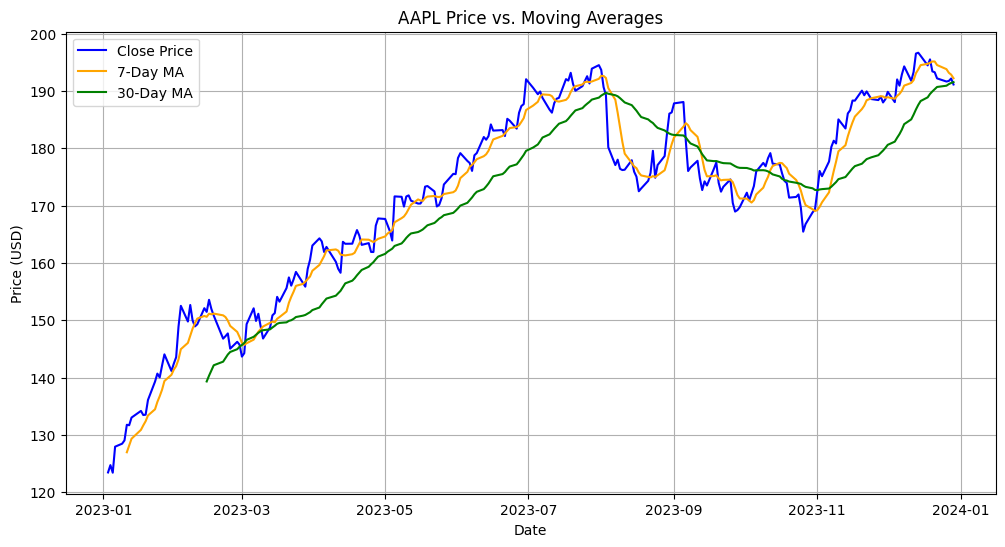

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA7'], label='7-Day MA', color='orange')
plt.plot(data['MA30'], label='30-Day MA', color='green')
plt.title('AAPL Price vs. Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

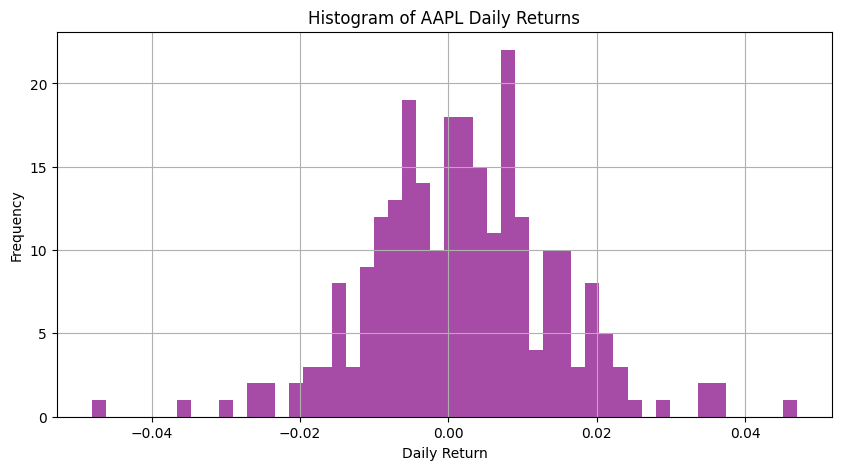

In [9]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Daily Return'].dropna(), bins=50, alpha=0.7, color='purple')
plt.title('Histogram of AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
# Calculate percentage change over the entire period
start_price = data['Close'].iloc[0].item()
end_price = data['Close'].iloc[-1].item()
growth = ((end_price - start_price) / start_price) * 100
print(f"Apple stock grew by {growth:.2f}% over the analysis period.")


Apple stock grew by 54.80% over the analysis period.


## Findings & Insights

- **Stock Trend:** Apple stock showed an upward trend with **58.80% growth over 1 year**.
- **Volatility:** Daily returns ranged between -2% and +2%, indicating moderate volatility.
- **Moving Averages:** The 7-day and 30-day moving averages revealed short-term corrections but an overall upward movement.
